In [185]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import json
import graphviz
from sklearn.svm import SVC  
from IPython.display import SVG
from mlxtend.evaluate import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix
from multiscorer import MultiScorer
from sklearn.utils import resample
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_validate,KFold,learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_val_score
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import *
import collections
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer
import collections
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,make_scorer,f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
#Load Dataset for tweet and tag 
def Load_data(path):
    with open(path) as json_data:
        data=json.load(json_data)
    new_data = []
    for item in data:
        new_entry = {}
        for k,v in item.items():
        # a dictionary will return True for isinstance(v, dict)
            if not isinstance(v, dict):
            # v is not a dictionary here
                new_entry[k] = v
            else:
            # v is a dictionary, so we flatten it
                 for a,b in v.items():
                     new_entry[a] = b
        new_data.append(new_entry)
    return pd.DataFrame(new_data)

In [7]:
path ='Users/Mayona/Desktop/Jupyter/Have_balanced_dataset.json'
tweet=Load_data(path)

FileNotFoundError: [Errno 2] No such file or directory: 'Users/Mayona/Desktop/Jupyter/Have_balanced_dataset.json'

In [60]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 10 columns):
favorite_count      527 non-null int64
follower_count      527 non-null int64
name                527 non-null object
pk                  527 non-null int64
profile_image       527 non-null object
retweet_count       527 non-null int64
tag                 527 non-null object
text                527 non-null object
tweet_twitter_id    527 non-null object
tweeted_on          527 non-null object
dtypes: int64(4), object(6)
memory usage: 41.2+ KB


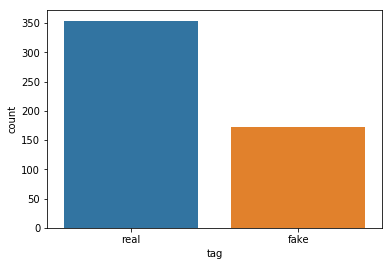

In [61]:
sns.countplot(tweet['tag'],label="Count")
plt.show()

In [62]:
tweet['tag'].value_counts()

real    354
fake    173
Name: tag, dtype: int64

In [70]:
tweet = shuffle(tweet)
tweet.head()

,text,tag
464,Remember this name: Loujain (pronounced Loo-JA...,1
229,Manchester United executives have met with off...,1
304,#Netflix criticized for pulling satire episode...,0
277,"This is what I call transparency, the Kingdom ...",0
278,"Sanad Mohammed bin Salman will launch the ""San...",0


In [69]:
tweet.drop("favorite_count", axis=1, inplace=True) 
tweet.drop("follower_count", axis=1, inplace=True)
tweet.drop("name", axis=1, inplace=True)
tweet.drop("pk", axis=1, inplace=True)
tweet.drop("profile_image", axis=1, inplace=True)
tweet.drop("retweet_count", axis=1, inplace=True)
tweet.drop("tweet_twitter_id", axis=1, inplace=True)
tweet.drop("tweeted_on", axis=1, inplace=True)

KeyError: "['favorite_count'] not found in axis"

In [67]:
tweet=pd.get_dummies(tweet, columns=["tag"],prefix=["tweet"])
tweet.drop("tweet_real", axis=1, inplace=True)
tweet.rename(columns={'tweet_fake':'tag'},inplace=True)

# Preprocessing

### first try to use strong clean process to text then apply snowball Stremmer

#### strong clean process 

In [71]:
def processTweet1(tweet):
    # Remove HTML special entities (e.g. &)
    tweet = re.sub(r'\&\w*;', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    tweet=re.sub("[^a-zA-Z]"," ",tweet)
    return tweet

In [72]:
tweet['strong_pro1'] = tweet['text'].apply(processTweet1)
tweet.head(n=20)

/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,tag,strong_pro1
464,Remember this name: Loujain (pronounced Loo-JA...,1,remember this name loujain pronounced loo ja...
229,Manchester United executives have met with off...,1,manchester united executives have met with off...
304,#Netflix criticized for pulling satire episode...,0,criticized for pulling satire episode episode ...
277,"This is what I call transparency, the Kingdom ...",0,this what call transparency the kingdom has n...
278,"Sanad Mohammed bin Salman will launch the ""San...",0,sanad mohammed bin salman will launch the san...
231,#Saudi teenager who fled family and sought asy...,0,teenager who fled family and sought asylum whe...
491,We honor murdered journalist Jamal Khashoggi b...,1,honor murdered journalist jamal khashoggi keep...
298,#SAVIT in #Saudi #Arabia deployed #Microsoft #...,0,deployed online along with for gaca general...
75,A #Saudi #Citizen Aged 100 Has Inspired #Peopl...,0,aged has inspired after returning complete...
155,🇬🇧| The clashes between the Saudi security for...,1,the clashes between the saudi security for...


In [73]:
stemmer=SnowballStemmer("english")

Snowball Stemmer

In [74]:
ps = SnowballStemmer("english")
tweet['Stemming'] = tweet['strong_pro1'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))


/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
tweet.head()

,text,tag,strong_pro1,Stemming
464,"Remember this name: Loujain (pronounced Loo-JAYNE) al-Hathloul. She is 29 years old and a courageous advocate for gender equality — so she is in a Saudi Arabian prison, and reportedly our Saudi allies have tortured her, even waterboarded her. https://t.co/rHur9YIr8s",1,remember this name loujain pronounced loo jayne hathloul she years old and courageous advocate for gender equality she saudi arabian prison and reportedly our saudi allies have tortured her even waterboarded her,rememb this name loujain pronounc loo jayn hathloul she year old and courag advoc for gender equal she saudi arabian prison and report our saudi alli have tortur her even waterboard her
229,Manchester United executives have met with officials in Saudi Arabia against a backdrop of speculation suggesting t… https://t.co/IOlZHBvutG,1,manchester united executives have met with officials saudi arabia against backdrop speculation suggesting,manchest unit execut have met with offici saudi arabia against backdrop specul suggest
304,"#Netflix criticized for pulling satire episode in #Saudi\nEpisode of #HasanMinhaj's Patriot Act, critical of #Saudi leader, says original praise undue\n\n#MNA_English \n#MNA \n#Anglophones https://t.co/kbICO1SfVN",0,criticized for pulling satire episode episode patriot act critical leader says original praise undue,critic for pull satir episod episod patriot act critic leader say origin prais undu
277,"This is what I call transparency, the Kingdom has nothing to hide in regards to the unfounded allegations in @nytimesworld about the recruitment of children .. hence the invitation to see themselves that there is no such things #fakenews #fakemedia #accusition #sudan #saudi https://t.co/KWA3xm0pAS",0,this what call transparency the kingdom has nothing hide regards the unfounded allegations nytimesworld about the recruitment children hence the invitation see themselves that there such things,this what call transpar the kingdom has noth hide regard the unfound alleg nytimesworld about the recruit children henc the invit see themselv that there such thing
278,"Sanad Mohammed bin Salman will launch the ""Sanad of marriage"" initiative in pursuit of the principles of family stability, urging young people to marry and motivate those who are unable to enable them to build their families and achieve happiness for them.\n\n#MBS\n#SaudiArabia https://t.co/eELc...",0,sanad mohammed bin salman will launch the sanad marriage initiative pursuit the principles family stability urging young people marry and motivate those who are unable enable them build their families and achieve happiness for them,sanad moham bin salman will launch the sanad marriag initi pursuit the principl famili stabil urg young peopl marri and motiv those who are unabl enabl them build their famili and achiev happi for them


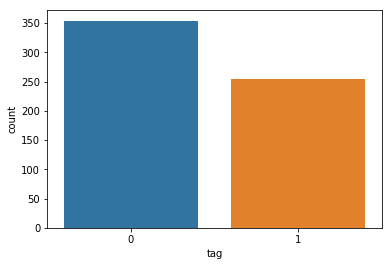

0    354
1    254
Name: tag, dtype: int64

In [108]:
#increase minority class
# 1=fake tag,0= real tag

sample=tweet.copy()
minority_df = sample[sample.tag == 1]
majority_df = sample[sample.tag == 0]
minority_df = resample(minority_df, replace=True, n_samples=254, random_state=123)
df_balanced = pd.concat([majority_df, minority_df])
sns.countplot(df_balanced['tag'],label="Count")
plt.show()

In [11]:
df_balanced['tag'].value_counts()

0    354
1    254
Name: tag, dtype: int64

In [109]:
ex=df_balanced.to_json(r'/Users/Mayona/Desktop/Jupyter/Have_balanced_dataset.json', orient='records')

# shuffle 

In [19]:
df_balanced = shuffle(df_balanced)

In [12]:
scorer = MultiScorer({
    'weighted average of precision': (precision_score,{'average': 'weighted'}),
    'weighted average of recall'   : (recall_score,   {'average': 'weighted'}),
    'weighted average of F-measure': (f1_score,       {'average': 'weighted'})
})

# pipeline

# 2 pipeline will be tested
First: pipeline consist of BoW(CountVectorizer( )) + Classifier

Second: pipeline consist of BoW+Tf-Idf (TfidfVectorizer( )) - Equivalent to CountVectorizer followed by TfidfTransformer + classifier.

Four experiments per classifier

First-  BoW + Preprocessed text 

Second- BoW+ Preprocessed text + Stemming 

Third-  Tf-Idf+ Preprocessed text 

Fourth- Tf-Idf + Preprocessed text + Stemming 

In all experiments split the data 25% / 75% and the value of fold -cv = 5 and the random_state=42. To make the split will be always the same, and make sure to get reproducible results,

# Decision Tree Classifier

Exp1: Bow + Preprocessed text

In [156]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42))])



In [157]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}


In [158]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [159]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [160]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[82  7]
 [16 47]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.84      0.92      0.88        89
           1       0.87      0.75      0.80        63

   micro avg       0.85      0.85      0.85       152
   macro avg       0.85      0.83      0.84       152
weighted avg       0.85      0.85      0.85       152
 

Train Accuracy 0.8728070175438597
Test Accuracy: 0.8486842105263158
roc_auc_score 0.8336900303192438


Exp2: Bow + Preprocessed text +Stemming

In [151]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42))])



In [152]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}


In [153]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [154]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [155]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[81  8]
 [22 41]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.79      0.91      0.84        89
           1       0.84      0.65      0.73        63

   micro avg       0.80      0.80      0.80       152
   macro avg       0.81      0.78      0.79       152
weighted avg       0.81      0.80      0.80       152
 

Train Accuracy 0.8793859649122807
Test Accuracy: 0.8026315789473685
roc_auc_score 0.7804530051721063


Exp3- Tf-Idf+ Preprocessed text 

In [161]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42))])



In [162]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}


In [163]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [164]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: char
	vectorizer__ngram_range: (1, 2)


In [165]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[77 12]
 [20 43]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.79      0.87      0.83        89
           1       0.78      0.68      0.73        63

   micro avg       0.79      0.79      0.79       152
   macro avg       0.79      0.77      0.78       152
weighted avg       0.79      0.79      0.79       152
 

Train Accuracy 0.9780701754385965
Test Accuracy: 0.7894736842105263
roc_auc_score 0.7738541109327626


Tf-Idf + Preprocessed text + Stemming 



In [166]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42))])



In [167]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}


In [168]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [169]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [170]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[69 20]
 [24 39]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.74      0.78      0.76        89
           1       0.66      0.62      0.64        63

   micro avg       0.71      0.71      0.71       152
   macro avg       0.70      0.70      0.70       152
weighted avg       0.71      0.71      0.71       152
 

Train Accuracy 0.8969298245614035
Test Accuracy: 0.7105263157894737
roc_auc_score 0.6971642589620117


# Kneighbors Classifier

# Decision Tree Classifier


Exp1: Bow + Preprocessed text

In [286]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,class_weight={1:4,0:1}))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [287]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [288]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
# check the performance of model on both, train and validation. If training accuracy 
#is extremely high and testing is not the same, then the model is overfitting.
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[82  7]
 [25 38]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.77      0.92      0.84        89
           1       0.84      0.60      0.70        63

   micro avg       0.79      0.79      0.79       152
   macro avg       0.81      0.76      0.77       152
weighted avg       0.80      0.79      0.78       152
 

Train Accuracy 0.8837719298245614
Test Accuracy: 0.7894736842105263
roc_auc_score 0.7622614588906724


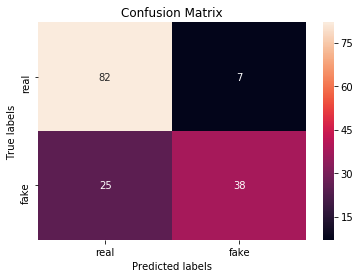

In [289]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [290]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,class_weight={1:4,0:1}))])



In [291]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [292]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [293]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[78 11]
 [22 41]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.78      0.88      0.83        89
           1       0.79      0.65      0.71        63

   micro avg       0.78      0.78      0.78       152
   macro avg       0.78      0.76      0.77       152
weighted avg       0.78      0.78      0.78       152
 

Train Accuracy 0.8903508771929824
Test Accuracy: 0.7828947368421053
roc_auc_score 0.7635990725878367


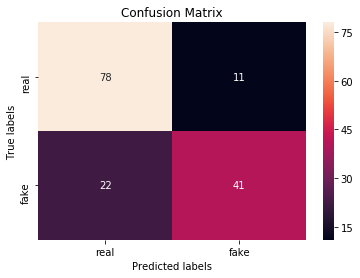

In [294]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [295]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,class_weight={1:4,0:1}))])


In [296]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}



In [297]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [298]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 10
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [299]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[79 10]
 [20 43]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.80      0.89      0.84        89
           1       0.81      0.68      0.74        63

   micro avg       0.80      0.80      0.80       152
   macro avg       0.80      0.79      0.79       152
weighted avg       0.80      0.80      0.80       152
 

Train Accuracy 0.8947368421052632
Test Accuracy: 0.8026315789473685
roc_auc_score 0.7850900659889424


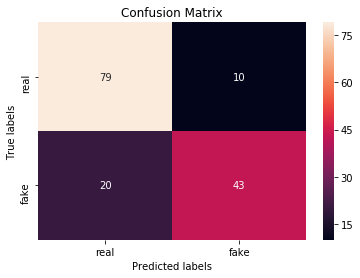

In [300]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming 

In [301]:


x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', DecisionTreeClassifier(random_state=42,class_weight={1:4,0:1}))])


In [302]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__max_depth':[3,5,8,10]
}

In [303]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__max_depth': [3, 5, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [304]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))



Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...        min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))]) 

	classifier__max_depth: 8
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [305]:
best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[84  5]
 [18 45]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.82      0.94      0.88        89
           1       0.90      0.71      0.80        63

   micro avg       0.85      0.85      0.85       152
   macro avg       0.86      0.83      0.84       152
weighted avg       0.86      0.85      0.85       152
 

Train Accuracy 0.8991228070175439
Test Accuracy: 0.8486842105263158
roc_auc_score 0.8290529695024078


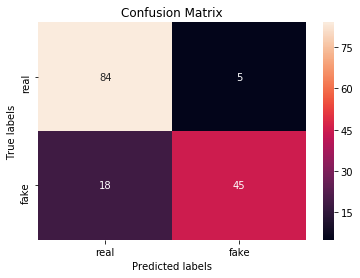

In [306]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

# Kneighbors Classifier

Exp1: Bow + Preprocessed text

In [307]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__n_neighbors':range(1,30)
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__n_neighbors': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [308]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...ki',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform'))]) 

	classifier__n_neighbors: 3
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [309]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[86  3]
 [ 9 54]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.91      0.97      0.93        89
           1       0.95      0.86      0.90        63

   micro avg       0.92      0.92      0.92       152
   macro avg       0.93      0.91      0.92       152
weighted avg       0.92      0.92      0.92       152
 

Train Accuracy 0.9605263157894737
Test Accuracy: 0.9210526315789473
roc_auc_score 0.911717495987159


In [310]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 2))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.6052631578947368
0.9276315789473685
0.9210526315789473
0.8289473684210527
0.8157894736842105
0.756578947368421
0.7960526315789473
0.75
0.7894736842105263
0.75
0.75
0.6973684210526315
0.6973684210526315
0.6842105263157895
0.6842105263157895
0.6578947368421053
0.6578947368421053
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6513157894736842
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.618421052631579
0.6381578947368421


Text(0, 0.5, 'cross-valdition Accuracy')

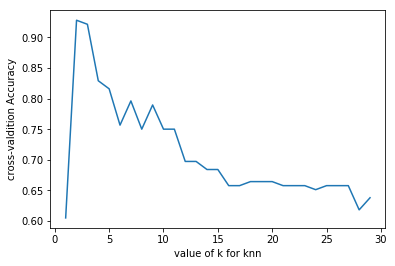

In [311]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")



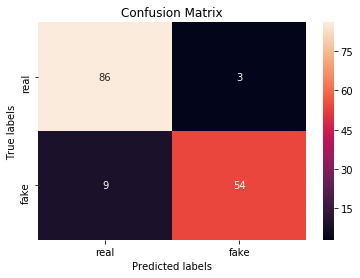

In [312]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [272]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])


In [273]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__n_neighbors':range(1,30)
}

In [274]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)

/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__n_neighbors': range(1, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [275]:
print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...ki',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform'))]) 

	classifier__n_neighbors: 2
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [276]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")

print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[87  2]
 [ 9 54]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.91      0.98      0.94        89
           1       0.96      0.86      0.91        63

   micro avg       0.93      0.93      0.93       152
   macro avg       0.94      0.92      0.92       152
weighted avg       0.93      0.93      0.93       152
 

Train Accuracy 0.9912280701754386
Test Accuracy: 0.9276315789473685
roc_auc_score 0.9173354735152488


In [277]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 2))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.6578947368421053
0.9276315789473685
0.9144736842105263
0.8421052631578947
0.8289473684210527
0.743421052631579
0.7828947368421053
0.7631578947368421
0.7697368421052632
0.7631578947368421
0.7631578947368421
0.7171052631578947
0.7302631578947368
0.6842105263157895
0.7105263157894737
0.6710526315789473
0.6842105263157895
0.6578947368421053
0.6513157894736842
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053
0.6578947368421053


Text(0, 0.5, 'cross-valdition Accuracy')

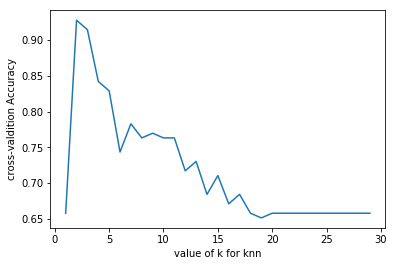

In [278]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")



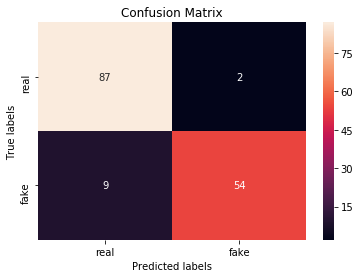

In [279]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [313]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])


In [314]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__n_neighbors':range(1,30)
}

In [315]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


/anaconda3/envs/TestYoutube/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__n_neighbors': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [316]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ki',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'))]) 

	classifier__n_neighbors: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [317]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[79 10]
 [ 5 58]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.94      0.89      0.91        89
           1       0.85      0.92      0.89        63

   micro avg       0.90      0.90      0.90       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.90      0.90      0.90       152
 

Train Accuracy 0.9956140350877193
Test Accuracy: 0.9013157894736842
roc_auc_score 0.9041376850365613


In [321]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 1))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.6644736842105263
0.9078947368421053
0.8947368421052632
0.8355263157894737
0.8223684210526315
0.8092105263157895
0.8289473684210527
0.7960526315789473
0.8026315789473685
0.756578947368421
0.7697368421052632
0.743421052631579
0.743421052631579
0.7302631578947368
0.7368421052631579
0.7039473684210527
0.6973684210526315
0.6776315789473685
0.6776315789473685
0.6644736842105263
0.6776315789473685
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6644736842105263
0.6578947368421053
0.6710526315789473
0.6644736842105263
0.6644736842105263


Text(0, 0.5, 'cross-valdition Accuracy')

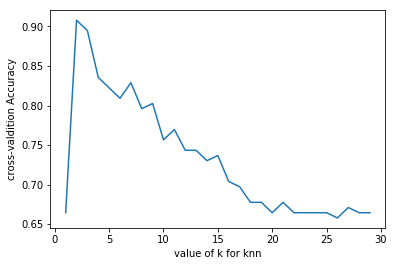

In [322]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")




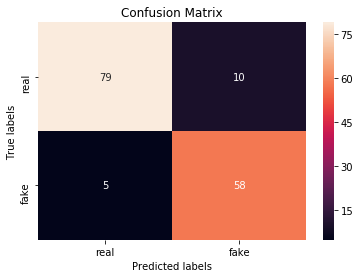

In [318]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming

In [324]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', KNeighborsClassifier())])


In [325]:
grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__n_neighbors':range(1,30)
}

In [326]:

grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__n_neighbors': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [327]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...ki',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform'))]) 

	classifier__n_neighbors: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [328]:

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[79 10]
 [ 5 58]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.94      0.89      0.91        89
           1       0.85      0.92      0.89        63

   micro avg       0.90      0.90      0.90       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.90      0.90      0.90       152
 

Train Accuracy 0.9956140350877193
Test Accuracy: 0.9013157894736842
roc_auc_score 0.9041376850365613


In [329]:
# plot represents the classifier accuracy and shows that the highest accuracy is as shown by gridSearchCv
K_rang=range(1,30)
K_score=[]
for k in K_rang:
    pipelineTf_Idf = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english',analyzer='word',ngram_range=(1, 1))),
    ('classifier', KNeighborsClassifier(k))])
    
    model=pipelineTf_Idf.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    K_score.append(accuracy_score(Y_test, y_pred))
for i in K_score:
    print(i)

0.75
0.9276315789473685
0.9078947368421053
0.8289473684210527
0.8355263157894737
0.8092105263157895
0.8157894736842105
0.7894736842105263
0.7960526315789473
0.7631578947368421
0.7697368421052632
0.7631578947368421
0.7828947368421053
0.7368421052631579
0.743421052631579
0.7105263157894737
0.7171052631578947
0.7039473684210527
0.7039473684210527
0.7039473684210527
0.7105263157894737
0.6842105263157895
0.6973684210526315
0.6710526315789473
0.6710526315789473
0.6644736842105263
0.6710526315789473
0.6644736842105263
0.6644736842105263


Text(0, 0.5, 'cross-valdition Accuracy')

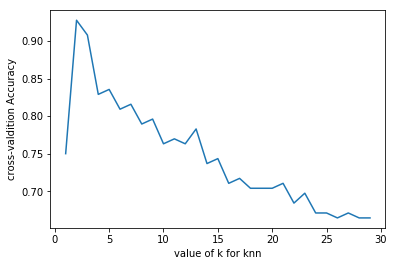

In [330]:

#polt the value of K for KNN
plt.plot(K_rang,K_score)
plt.xlabel("value of k for knn")
plt.ylabel("cross-valdition Accuracy")




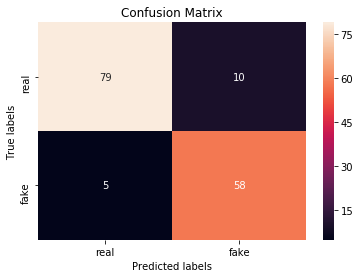

In [331]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

# SVM

Exp1: Bow + Preprocessed text

In [344]:
x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__C':[0.01,0.1,1,10]
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [345]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 0.1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [346]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[88  1]
 [ 7 56]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.93      0.99      0.96        89
           1       0.98      0.89      0.93        63

   micro avg       0.95      0.95      0.95       152
   macro avg       0.95      0.94      0.94       152
weighted avg       0.95      0.95      0.95       152
 

Train Accuracy 0.9912280701754386
Test Accuracy: 0.9473684210526315
roc_auc_score 0.9388264669163545


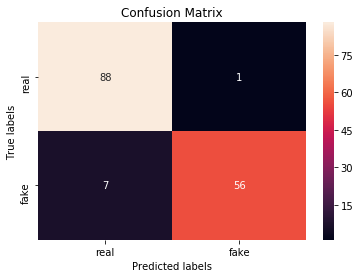

In [347]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp2: Bow + Preprocessed text +Stemming


In [348]:
x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__C':[0.01,0.1,1,10]
}


grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [349]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
  ...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [350]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[87  2]
 [ 6 57]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.94      0.98      0.96        89
           1       0.97      0.90      0.93        63

   micro avg       0.95      0.95      0.95       152
   macro avg       0.95      0.94      0.95       152
weighted avg       0.95      0.95      0.95       152
 

Train Accuracy 0.9978070175438597
Test Accuracy: 0.9473684210526315
roc_auc_score 0.9411449973247724


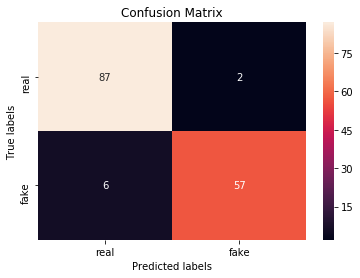

In [351]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp3- Tf-Idf+ Preprocessed text 


In [352]:

x=df_balanced["strong_pro1"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__C':[0.01,0.1,1,10]
}

In [353]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [354]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 1)


In [355]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[86  3]
 [ 6 57]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.93      0.97      0.95        89
           1       0.95      0.90      0.93        63

   micro avg       0.94      0.94      0.94       152
   macro avg       0.94      0.94      0.94       152
weighted avg       0.94      0.94      0.94       152
 

Train Accuracy 0.9890350877192983
Test Accuracy: 0.9407894736842105
roc_auc_score 0.9355270197966827


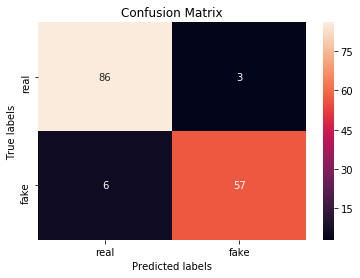

In [356]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);

Exp4- Tf-Idf + Preprocessed text + Stemming

In [359]:

x=df_balanced["Stemming"]
y=df_balanced['tag']

X_train, X_test, Y_train, Y_test = model_selection.train_test_split( x, y, stratify=y, random_state=42,test_size=0.25)

pipeline = Pipeline([
    ('vectorizer',TfidfVectorizer(stop_words='english')),
    ('classifier', SVC(kernel='linear'))])


In [360]:

grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'vectorizer__analyzer':('word', 'char'),
    'classifier__C':[0.01,0.1,1,10]
}

In [361]:
grid_search = GridSearchCV(pipeline, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vectorizer__ngram_range': [(1, 1), (1, 2)], 'vectorizer__analyzer': ('word', 'char'), 'classifier__C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [362]:

print(grid_search.best_estimator_,"\n")

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(list(grid.keys())):
    print("\t{0}: {1}".format(param_name, best_parameters[param_name]))

best_model = grid_search.best_estimator_
y_pred=best_model.predict(X_test)


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]) 

	classifier__C: 1
	vectorizer__analyzer: word
	vectorizer__ngram_range: (1, 2)


In [363]:

confusion=confusion_matrix(Y_test, y_pred)
report=classification_report(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Confusion matrix \n",confusion,"\n")
print("Classification_report \n ",report,"\n")
print("Train Accuracy",accuracy_score(Y_train, best_model.predict(X_train)))
print("Test Accuracy:",accuracy_score(Y_test,y_pred))
print("roc_auc_score",roc_auc)

Confusion matrix 
 [[86  3]
 [ 5 58]] 

Classification_report 
                precision    recall  f1-score   support

           0       0.95      0.97      0.96        89
           1       0.95      0.92      0.94        63

   micro avg       0.95      0.95      0.95       152
   macro avg       0.95      0.94      0.95       152
weighted avg       0.95      0.95      0.95       152
 

Train Accuracy 0.993421052631579
Test Accuracy: 0.9473684210526315
roc_auc_score 0.9434635277331905


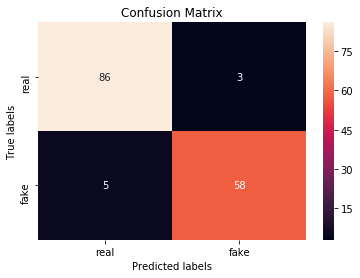

In [364]:
#confusion matrix plot

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['real', 'fake']); ax.yaxis.set_ticklabels(['real', 'fake']);